# **Project: Assessing the Impact of COVID-19 on U.S. Airline Carriers**

# **0. Load Dependencies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df_2019_carriers = pd.read_csv("2019_carrier_data.csv", index_col=0)

df_2020_carriers = pd.read_csv("2020_carrier_data.csv", index_col=0)

# **1. 2019 Airlines Data Exploration**

In [5]:
df_2019_carriers

,carrier,carrier_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,9E,Endeavor Air Inc.,23365.0,3965.0,946.29,139.99,1278.19,1.45,1599.17,246.0,57.0,305080.0,81530.0,22658.0,73966.0,150.0,126776.0
1,AA,American Airlines Inc.,79405.0,14617.0,4510.56,296.89,4924.37,36.08,4848.98,177.0,134.0,906494.0,321322.0,23198.0,203348.0,1361.0,357265.0
2,AS,Alaska Airlines Inc.,21993.0,5469.0,1347.44,58.86,2225.01,23.97,1813.73,241.0,51.0,313653.0,87950.0,3785.0,96684.0,896.0,124338.0
3,B6,JetBlue Airways,25217.0,8131.0,2746.45,70.54,2422.77,10.58,2880.69,183.0,71.0,723298.0,238720.0,12637.0,158828.0,456.0,312657.0
4,DL,Delta Air Lines Inc.,81524.0,12444.0,3825.61,460.67,4671.65,8.35,3477.60,26.0,93.0,734728.0,257675.0,43330.0,217742.0,436.0,215545.0
5,EV,ExpressJet Airlines LLC,11203.0,2694.0,640.84,59.48,1090.03,0.00,903.68,233.0,39.0,254148.0,79871.0,8325.0,87490.0,0.0,78462.0
6,F9,Frontier Airlines Inc.,12267.0,2882.0,899.14,23.88,910.20,0.00,1048.83,139.0,13.0,193371.0,57460.0,1633.0,44321.0,0.0,89957.0
7,G4,Allegiant Air,9381.0,2395.0,532.30,136.57,684.02,22.17,1019.96,70.0,15.0,160333.0,51789.0,12268.0,27541.0,804.0,67931.0
8,HA,Hawaiian Airlines Inc.,7276.0,813.0,557.16,15.43,15.24,4.61,220.56,8.0,1.0,28379.0,20721.0,452.0,369.0,159.0,6678.0
9,MQ,Envoy Air,27100.0,5528.0,1125.09,334.85,1688.88,8.50,2370.64,379.0,88.0,368659.0,79169.0,39127.0,74871.0,286.0,175206.0


## **1.1 Arrived, Delayed, Cancelled, Diverted Flights Numbers**

In [6]:
df_2019_carriers.columns

Index(['carrier', 'carrier_name', 'arr_flights', 'arr_del15', 'carrier_ct',
       'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')

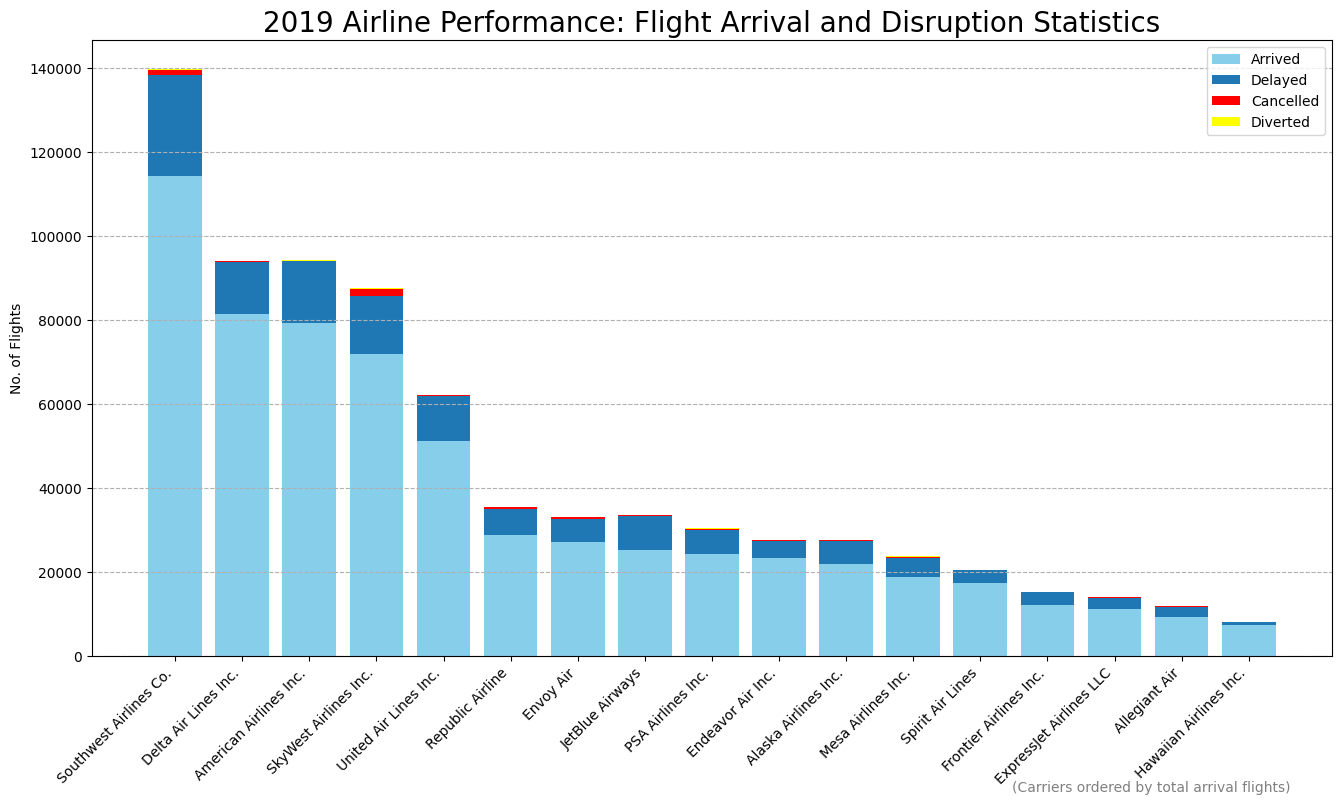

In [17]:
df_plot = df_2019_carriers[[ 'carrier_name', 'arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted']].sort_values(by='arr_flights', ascending = False)

carriers = df_plot.carrier_name

x = np.arange(len(carriers))

plt.figure(figsize = (16, 8))

plt.bar(x, df_plot['arr_flights'], label = 'Arrived', color = 'skyblue')
plt.bar(x, df_plot['arr_del15'], bottom = df_plot['arr_flights'], label = 'Delayed')
plt.bar(x, df_plot['arr_cancelled'], bottom = df_plot['arr_flights'] + df_plot['arr_del15'], label = 'Cancelled', color = 'r')
plt.bar(x, df_plot['arr_diverted'], bottom = df_plot['arr_flights'] + df_plot['arr_del15'] + df_plot['arr_cancelled'], label = 'Diverted', color = 'yellow')

plt.title('2019 Airline Performance: Flight Arrival and Disruption Statistics', fontsize = 20)
plt.xticks(x, carriers, rotation=45, ha='right')
plt.ylabel('No. of Flights')
plt.legend()
plt.grid(axis = 'y', linestyle = '--')
plt.figtext(0.7, -0.06, '(Carriers ordered by total arrival flights)', fontsize = 10, color = 'grey')
plt.show()


## **1.2 Delay Reason Distributions**

In [18]:
df_2019_carriers.columns

Index(['carrier', 'carrier_name', 'arr_flights', 'arr_del15', 'carrier_ct',
       'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')

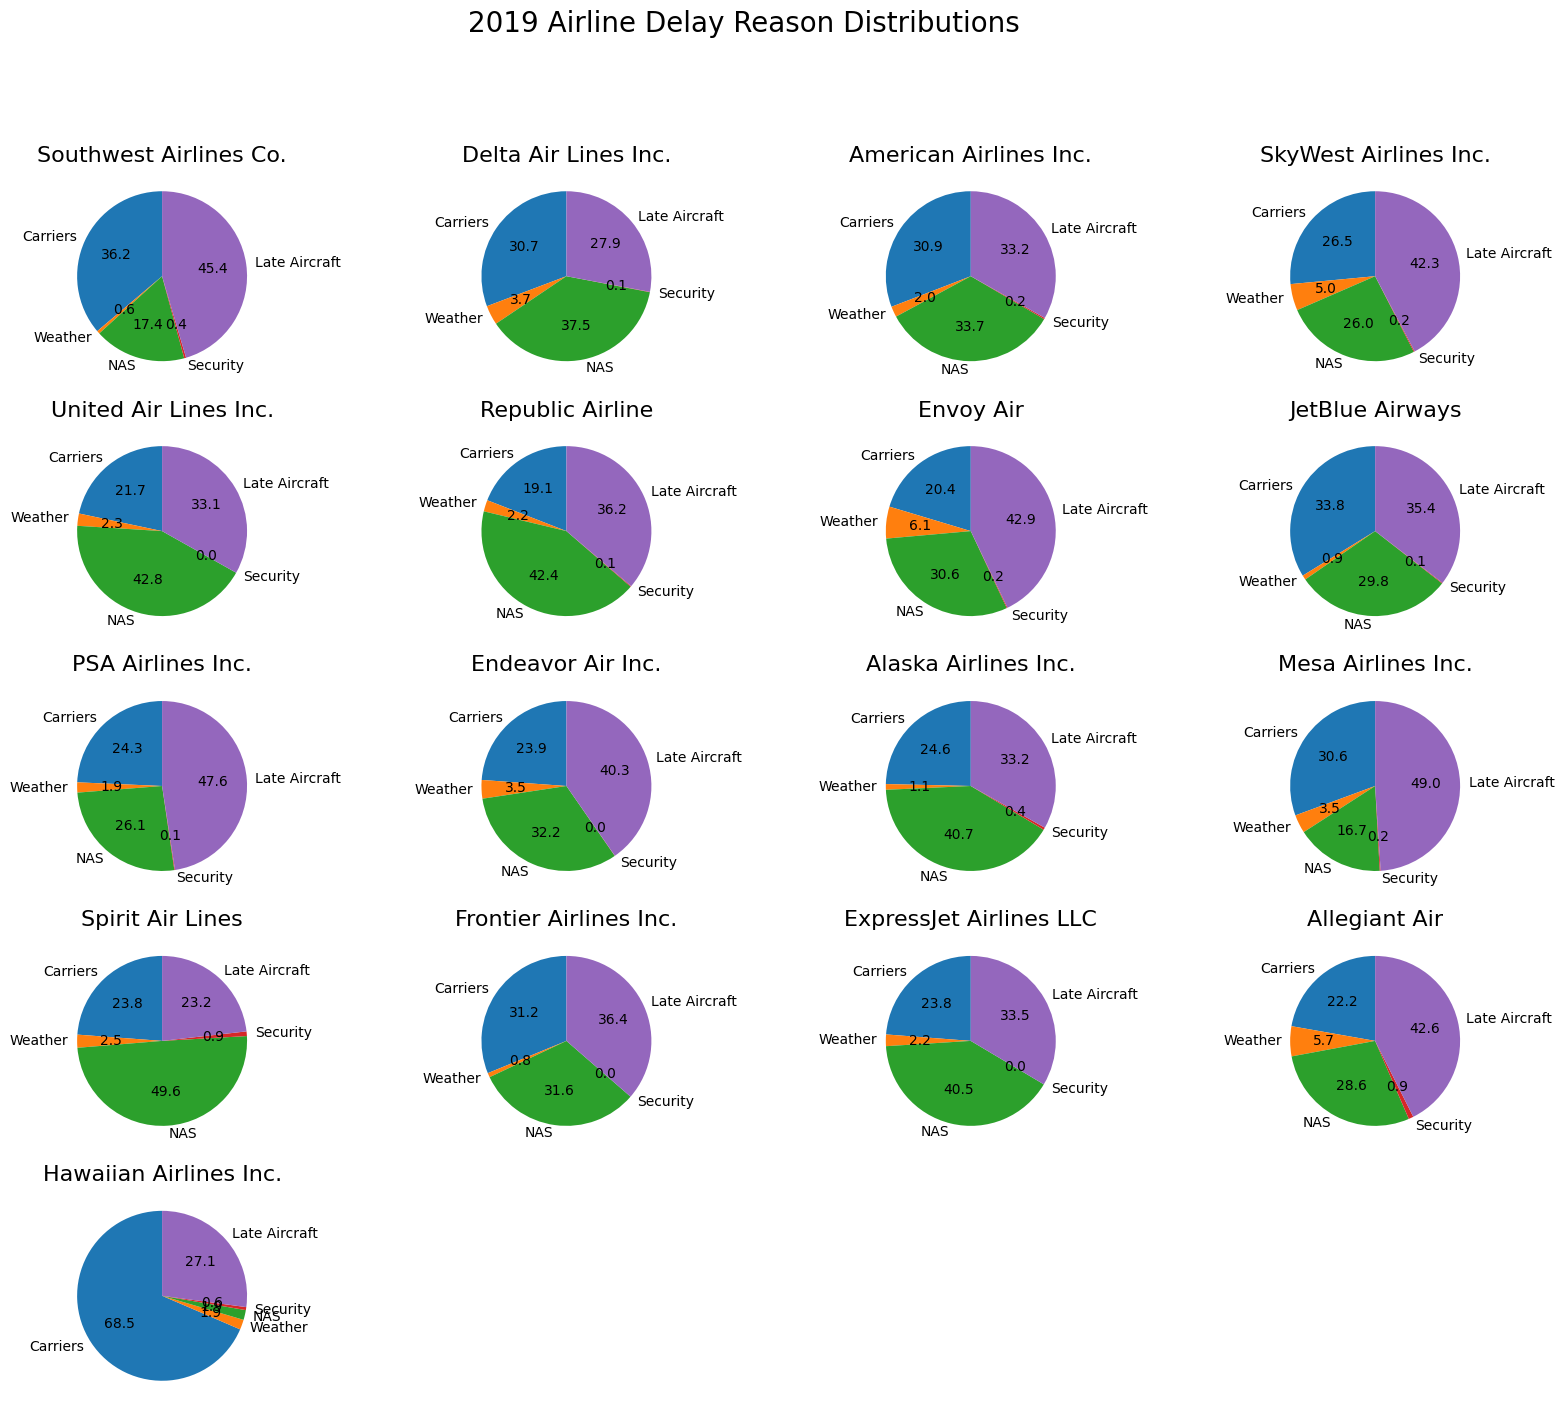

In [34]:
df_plot = df_2019_carriers[['carrier_name', 'arr_flights', 'arr_del15', 'carrier_ct',
       'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sort_values('arr_flights', ascending=False)

labels = ['Carriers', 'Weather', 'NAS', 'Security', 'Late Aircraft']

carriers = df_plot.carrier_name

plt.figure(figsize = (20, 16))
for i in range(len(carriers)):
    plt.subplot(5, 4, i+1)
    values= df_plot.iloc[i][['carrier_ct',
       'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].values
    plt.pie(values, labels = labels, autopct="%1.1f", startangle= 90 )
    plt.title(df_plot.iloc[i].carrier_name, fontsize = 16)

plt.suptitle('2019 Airline Delay Reason Distributions', fontsize=20)
plt.show()

## **1.3 Delay Times**

In [21]:
df_2019_carriers

,carrier,carrier_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,9E,Endeavor Air Inc.,23365.0,3965.0,946.29,139.99,1278.19,1.45,1599.17,246.0,57.0,305080.0,81530.0,22658.0,73966.0,150.0,126776.0
1,AA,American Airlines Inc.,79405.0,14617.0,4510.56,296.89,4924.37,36.08,4848.98,177.0,134.0,906494.0,321322.0,23198.0,203348.0,1361.0,357265.0
2,AS,Alaska Airlines Inc.,21993.0,5469.0,1347.44,58.86,2225.01,23.97,1813.73,241.0,51.0,313653.0,87950.0,3785.0,96684.0,896.0,124338.0
3,B6,JetBlue Airways,25217.0,8131.0,2746.45,70.54,2422.77,10.58,2880.69,183.0,71.0,723298.0,238720.0,12637.0,158828.0,456.0,312657.0
4,DL,Delta Air Lines Inc.,81524.0,12444.0,3825.61,460.67,4671.65,8.35,3477.60,26.0,93.0,734728.0,257675.0,43330.0,217742.0,436.0,215545.0
5,EV,ExpressJet Airlines LLC,11203.0,2694.0,640.84,59.48,1090.03,0.00,903.68,233.0,39.0,254148.0,79871.0,8325.0,87490.0,0.0,78462.0
6,F9,Frontier Airlines Inc.,12267.0,2882.0,899.14,23.88,910.20,0.00,1048.83,139.0,13.0,193371.0,57460.0,1633.0,44321.0,0.0,89957.0
7,G4,Allegiant Air,9381.0,2395.0,532.30,136.57,684.02,22.17,1019.96,70.0,15.0,160333.0,51789.0,12268.0,27541.0,804.0,67931.0
8,HA,Hawaiian Airlines Inc.,7276.0,813.0,557.16,15.43,15.24,4.61,220.56,8.0,1.0,28379.0,20721.0,452.0,369.0,159.0,6678.0
9,MQ,Envoy Air,27100.0,5528.0,1125.09,334.85,1688.88,8.50,2370.64,379.0,88.0,368659.0,79169.0,39127.0,74871.0,286.0,175206.0


In [22]:
df_2019_carriers.columns

Index(['carrier', 'carrier_name', 'arr_flights', 'arr_del15', 'carrier_ct',
       'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')

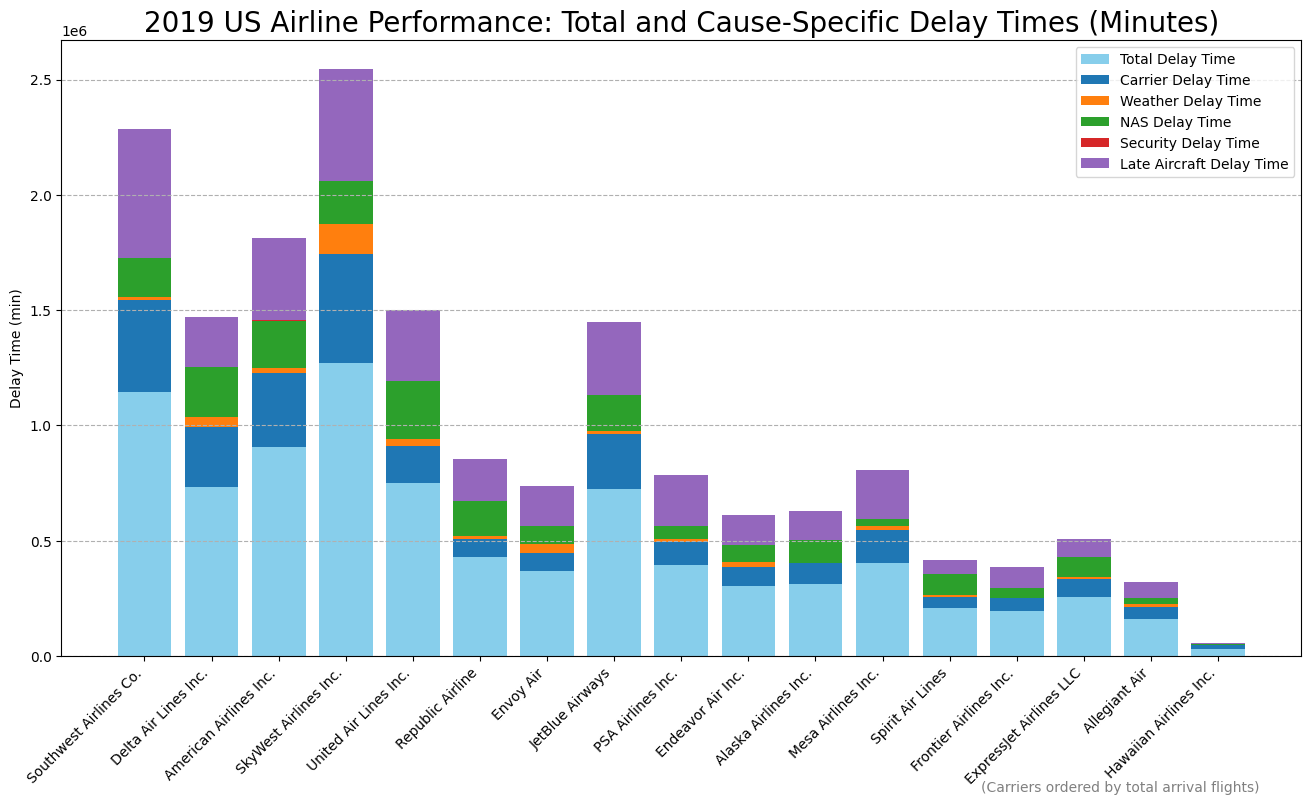

In [36]:
df_plot = df_2019_carriers[['carrier_name', 'arr_flights', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sort_values('arr_flights', ascending = False)

carriers = df_plot.carrier_name

x = np.arange(len(carriers))

plt.figure(figsize = (16, 8))

plt.bar(x, df_plot['arr_delay'], label = 'Total Delay Time', color = 'skyblue')
plt.bar(x, df_plot['carrier_delay'], bottom = df_plot['arr_delay'], label = 'Carrier Delay Time')
plt.bar(x, df_plot['weather_delay'], bottom = df_plot['arr_delay'] + df_plot['carrier_delay'], label = 'Weather Delay Time')
plt.bar(x, df_plot['nas_delay'], bottom = df_plot['arr_delay'] + df_plot['carrier_delay'] + df_plot['weather_delay'], label = 'NAS Delay Time')
plt.bar(x, df_plot['security_delay'], bottom = df_plot['arr_delay'] + df_plot['carrier_delay'] + df_plot['weather_delay'] + df_plot['nas_delay'], label = 'Security Delay Time')
plt.bar(x, df_plot['late_aircraft_delay'], bottom = df_plot['arr_delay'] + df_plot['carrier_delay'] + df_plot['weather_delay'] + df_plot['nas_delay'] + df_plot['security_delay'], label = 'Late Aircraft Delay Time')

plt.title('2019 US Airline Performance: Total and Cause-Specific Delay Times (Minutes)', fontsize = 20)
plt.xticks(x, carriers, rotation=45, ha='right')
plt.ylabel('Delay Time (min)')
plt.legend()
plt.grid(axis = 'y', linestyle = '--')
plt.figtext(0.7, -0.06, '(Carriers ordered by total arrival flights)', fontsize = 10, color = 'grey')
plt.show()


# **2. 2020 Airlines Data Exploration**

## **2.1 Arrived, Delayed, Cancelled, Diverted Flights Numbers**

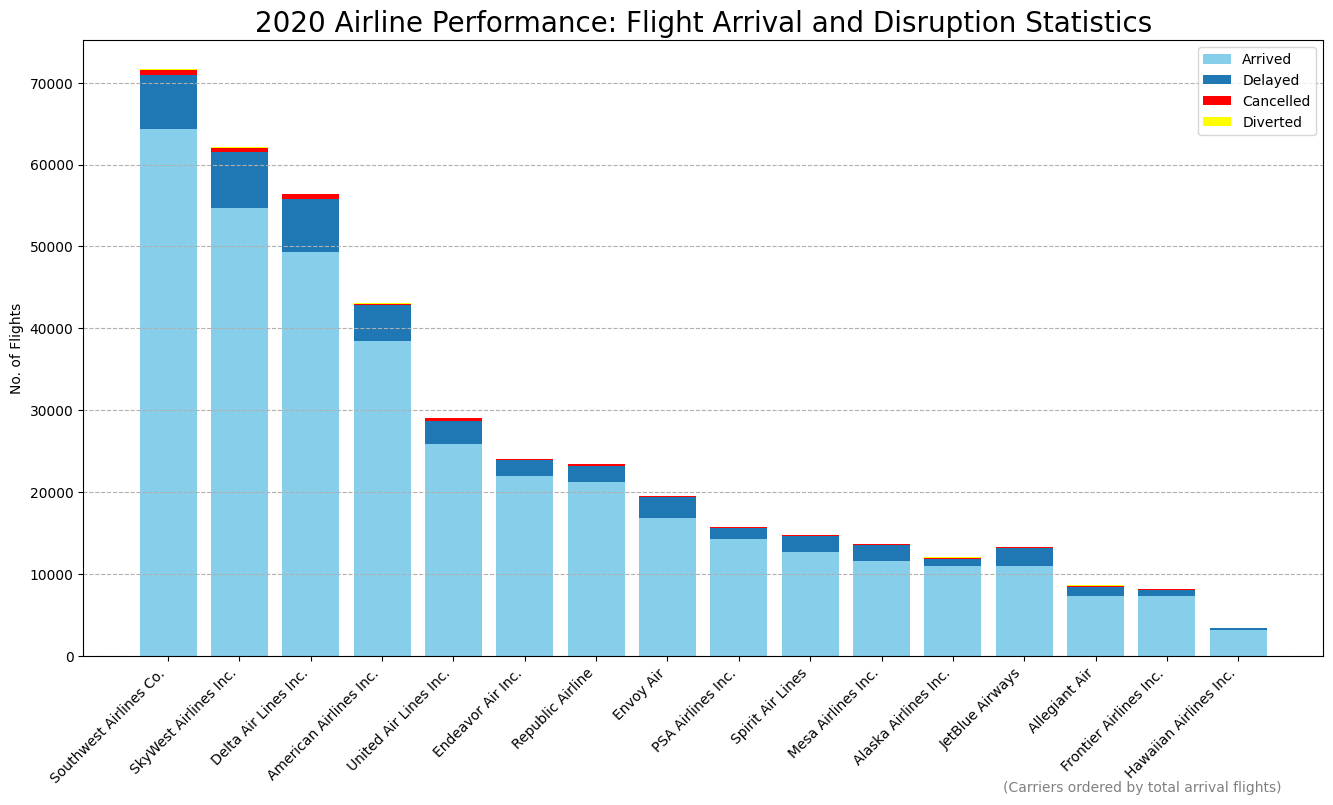

In [32]:
df_plot = df_2020_carriers[[ 'carrier_name', 'arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted']].sort_values(by='arr_flights', ascending = False)

carriers = df_plot.carrier_name

x = np.arange(len(carriers))

plt.figure(figsize = (16, 8))

plt.bar(x, df_plot['arr_flights'], label = 'Arrived', color = 'skyblue')
plt.bar(x, df_plot['arr_del15'], bottom = df_plot['arr_flights'], label = 'Delayed')
plt.bar(x, df_plot['arr_cancelled'], bottom = df_plot['arr_flights'] + df_plot['arr_del15'], label = 'Cancelled', color = 'r')
plt.bar(x, df_plot['arr_diverted'], bottom = df_plot['arr_flights'] + df_plot['arr_del15'] + df_plot['arr_cancelled'], label = 'Diverted', color = 'yellow')

plt.title('2020 Airline Performance: Flight Arrival and Disruption Statistics', fontsize = 20)
plt.xticks(x, carriers, rotation=45, ha='right')
plt.ylabel('No. of Flights')
plt.legend()
plt.grid(axis = 'y', linestyle = '--')
plt.figtext(0.7, -0.06, '(Carriers ordered by total arrival flights)', fontsize = 10, color = 'grey')
plt.show()

## **2.2 Delay Reason Distributions**

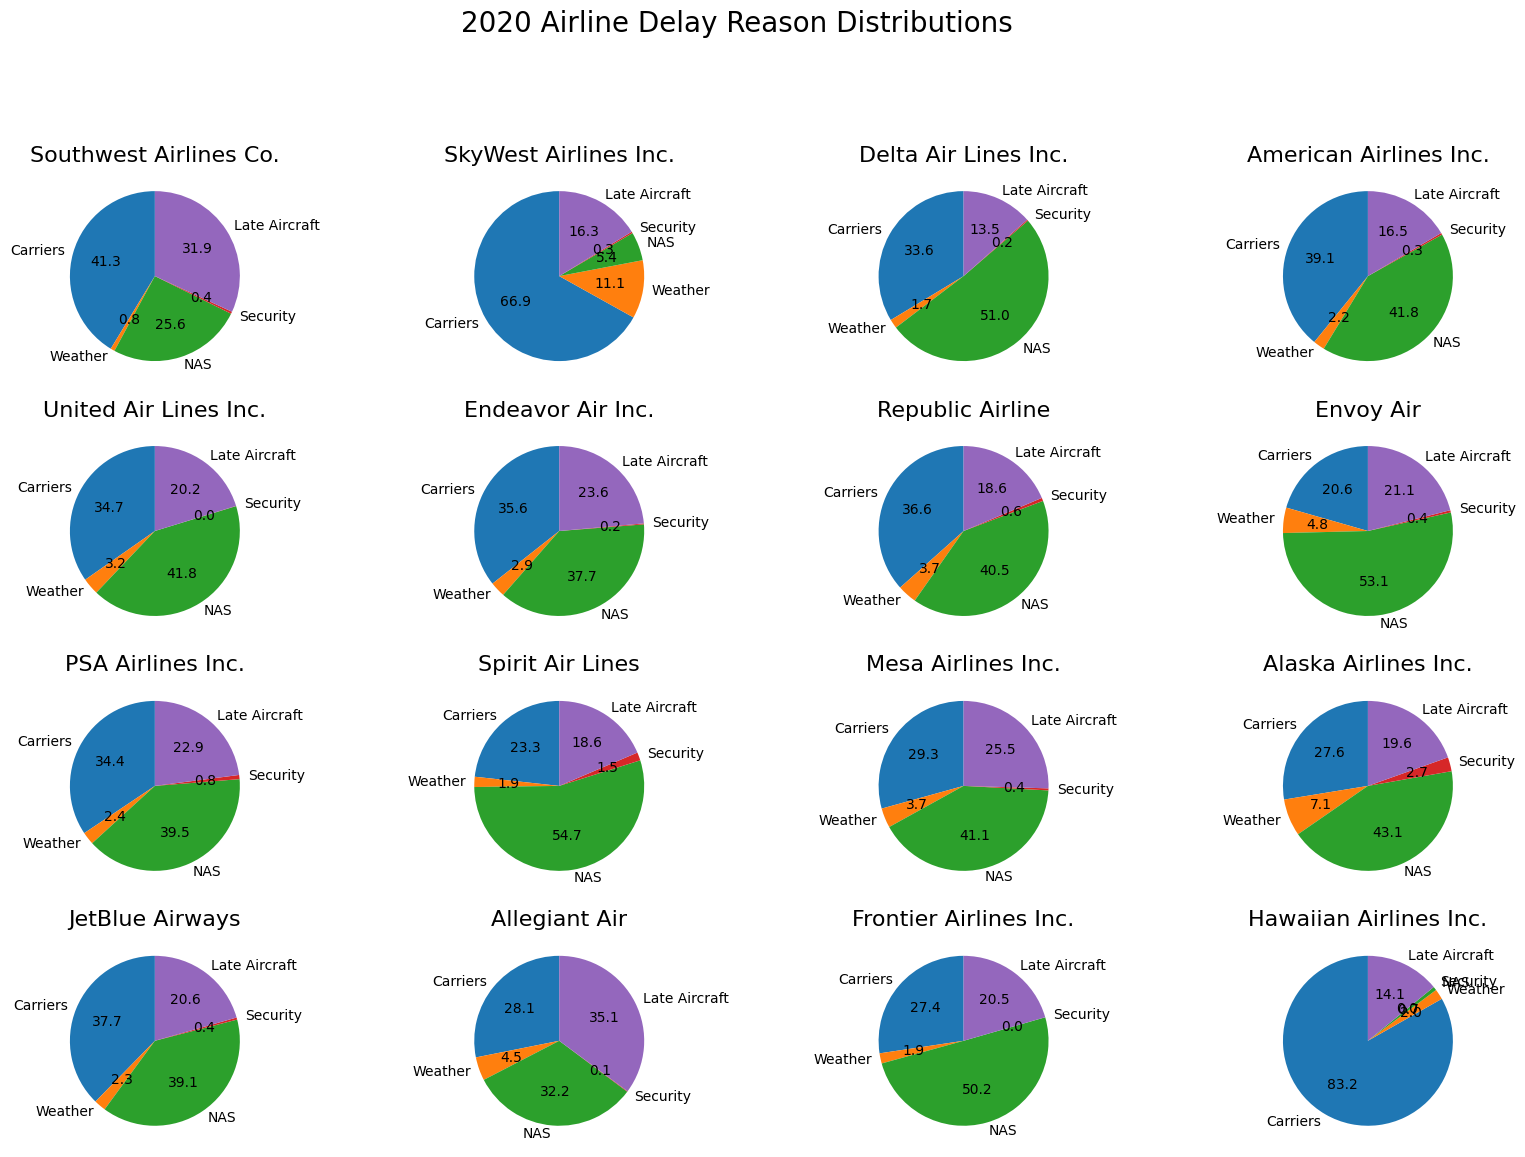

In [33]:
df_plot = df_2020_carriers[['carrier_name', 'arr_flights', 'arr_del15', 'carrier_ct',
       'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sort_values('arr_flights', ascending=False)

labels = ['Carriers', 'Weather', 'NAS', 'Security', 'Late Aircraft']

carriers = df_plot.carrier_name

plt.figure(figsize = (20, 16))
for i in range(len(carriers)):
    plt.subplot(5, 4, i+1)
    values= df_plot.iloc[i][['carrier_ct',
       'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].values
    plt.pie(values, labels = labels, autopct="%1.1f", startangle= 90 )
    plt.title(df_plot.iloc[i].carrier_name, fontsize = 16)

plt.suptitle('2020 Airline Delay Reason Distributions', fontsize=20)
plt.show()

## **2.3 Delay Times**

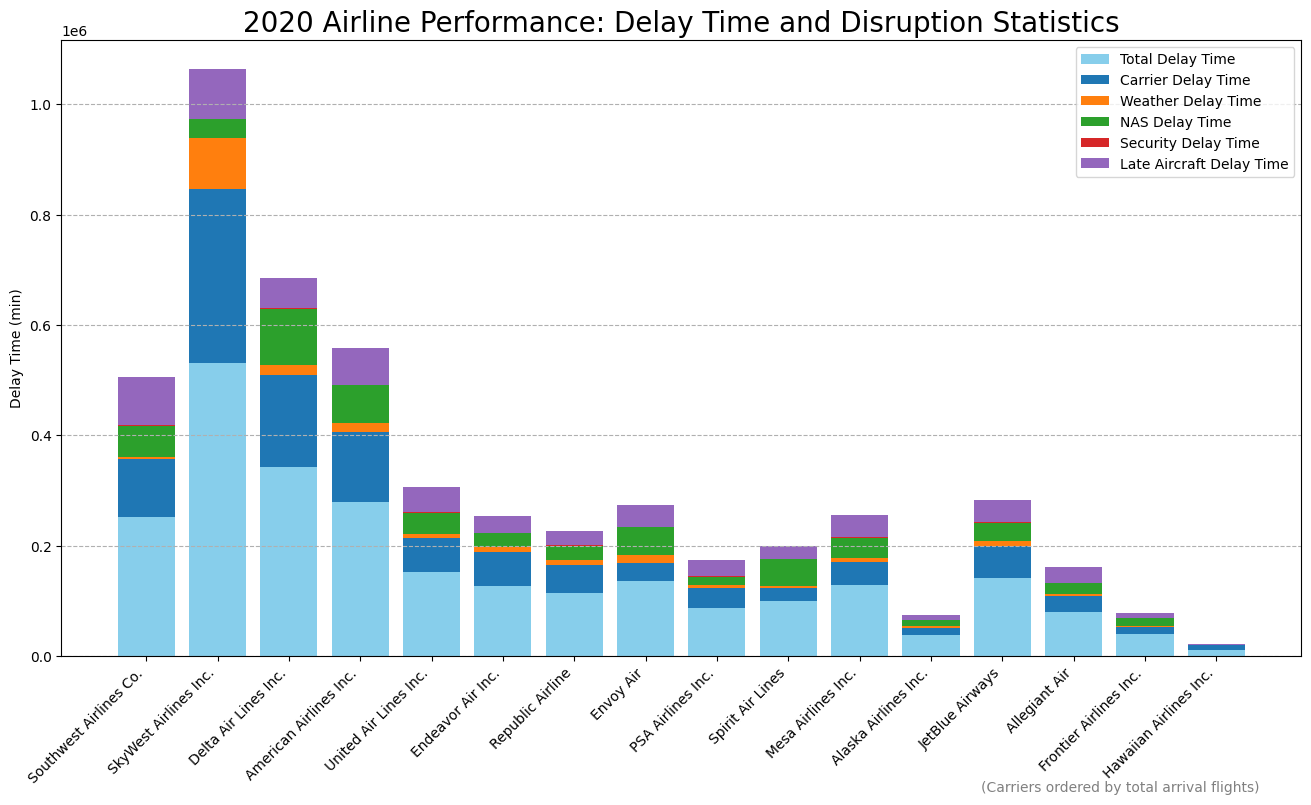

In [ ]:
df_plot = df_2020_carriers[['carrier_name', 'arr_flights', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sort_values('arr_flights', ascending = False)

carriers = df_plot.carrier_name

x = np.arange(len(carriers))

plt.figure(figsize = (16, 8))

plt.bar(x, df_plot['arr_delay'], label = 'Total Delay Time', color = 'skyblue')
plt.bar(x, df_plot['carrier_delay'], bottom = df_plot['arr_delay'], label = 'Carrier Delay Time')
plt.bar(x, df_plot['weather_delay'], bottom = df_plot['arr_delay'] + df_plot['carrier_delay'], label = 'Weather Delay Time')
plt.bar(x, df_plot['nas_delay'], bottom = df_plot['arr_delay'] + df_plot['carrier_delay'] + df_plot['weather_delay'], label = 'NAS Delay Time')
plt.bar(x, df_plot['security_delay'], bottom = df_plot['arr_delay'] + df_plot['carrier_delay'] + df_plot['weather_delay'] + df_plot['nas_delay'], label = 'Security Delay Time')
plt.bar(x, df_plot['late_aircraft_delay'], bottom = df_plot['arr_delay'] + df_plot['carrier_delay'] + df_plot['weather_delay'] + df_plot['nas_delay'] + df_plot['security_delay'], label = 'Late Aircraft Delay Time')

plt.title('2020 US Airline Performance: Total and Cause-Specific Delay Times (Minutes)', fontsize = 20)
plt.xticks(x, carriers, rotation=45, ha='right')
plt.ylabel('Delay Time (min)')
plt.legend()
plt.grid(axis = 'y', linestyle = '--')
plt.figtext(0.7, -0.06, '(Carriers ordered by total arrival flights)', fontsize = 10, color = 'grey')
plt.show()

# **3. Comparison between year 2019 and year 2020**

In [37]:
df_2019_carriers.shape, df_2020_carriers.shape

((17, 17), (16, 17))

**Which carrier of 2019 is not in 2020 data?**

In [38]:
df_2019_carriers[~df_2019_carriers['carrier'].isin(df_2020_carriers['carrier'])]

,carrier,carrier_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
5,EV,ExpressJet Airlines LLC,11203.0,2694.0,640.84,59.48,1090.03,0.0,903.68,233.0,39.0,254148.0,79871.0,8325.0,87490.0,0.0,78462.0


**Which carrier of 2020 is not in 2019 data?**

In [39]:
df_2020_carriers[~df_2020_carriers['carrier'].isin(df_2019_carriers['carrier'])]

,carrier,carrier_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay


### Observation 3:

- ExpressJet Airlines was not in 2020 data.

- According to the news, EV airlines went out of business in 2020, due to the financial impact of the Covid pandemic.

it was once the largest regional jet operator globally. But sadly, it had to end its business in 2020 May, offically filed for bankruptcy in 2022.

## **3.1 Arrived Flight Number Comparisons**

In [40]:
df_2019_carriers.columns

Index(['carrier', 'carrier_name', 'arr_flights', 'arr_del15', 'carrier_ct',
       'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [41]:
df_2019_2020 = pd.merge(df_2019_carriers[['carrier', 'carrier_name', 'arr_flights', 'arr_del15', 'arr_delay']], df_2020_carriers[['carrier', 'arr_flights', 'arr_del15', 'arr_delay']],
                        on = 'carrier', how ='left', suffixes= ('_2019', '_2020')).sort_values(by='arr_flights_2019', ascending=False)

df_2019_2020

,carrier,carrier_name,arr_flights_2019,arr_del15_2019,arr_delay_2019,arr_flights_2020,arr_del15_2020,arr_delay_2020
14,WN,Southwest Airlines Co.,114442.0,23993.0,1143380.0,64342.0,6585.0,252703.0
4,DL,Delta Air Lines Inc.,81524.0,12444.0,734728.0,49378.0,6419.0,342701.0
1,AA,American Airlines Inc.,79405.0,14617.0,906494.0,38496.0,4327.0,278851.0
12,OO,SkyWest Airlines Inc.,72004.0,13865.0,1272226.0,54674.0,6809.0,531774.0
13,UA,United Air Lines Inc.,51291.0,10693.0,750628.0,25892.0,2805.0,153161.0
16,YX,Republic Airline,28877.0,6041.0,427546.0,21257.0,1891.0,113676.0
9,MQ,Envoy Air,27100.0,5528.0,368659.0,16814.0,2542.0,136506.0
3,B6,JetBlue Airways,25217.0,8131.0,723298.0,10964.0,2232.0,141492.0
11,OH,PSA Airlines Inc.,24276.0,5769.0,392976.0,14291.0,1393.0,86976.0
0,9E,Endeavor Air Inc.,23365.0,3965.0,305080.0,22010.0,1895.0,126603.0


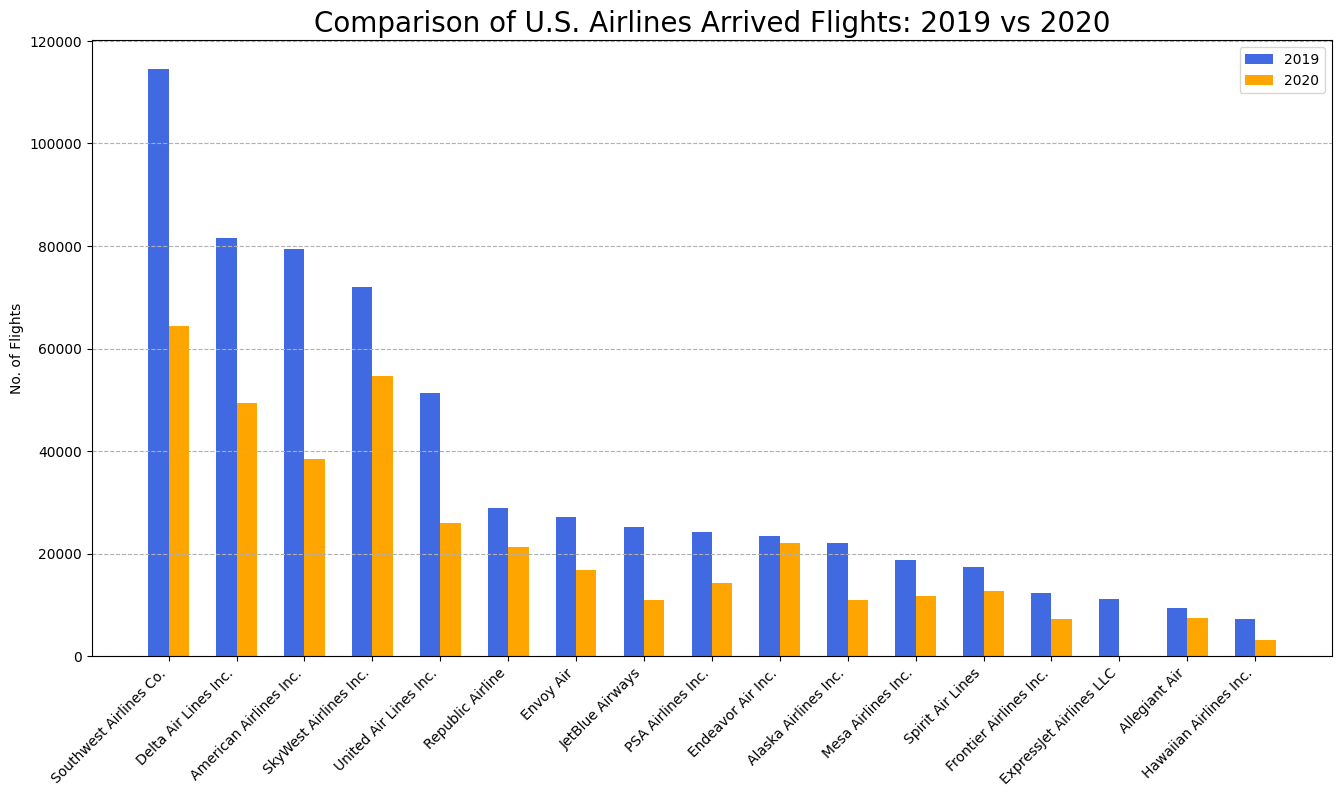

In [ ]:
carriers = df_2019_2020.carrier_name
x = np.arange(len(carriers))
width = 0.3

plt.figure(figsize = (16, 8))

plt.bar(x - width /2, df_2019_2020['arr_flights_2019'], width, label='2019', color='royalblue')
plt.bar(x + width /2, df_2019_2020['arr_flights_2020'], width, label='2020', color='orange')

plt.ylabel('No. of Flights')
plt.title('Comparison of U.S. Airlines Arrived Flights: 2019 vs 2020', fontsize=20)
plt.xticks(x, carriers, rotation = 45, ha = 'right')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()

In [46]:
# reduction rates calculation

df_2019_2020['reduction_rate'] = (df_2019_2020['arr_flights_2019'] - df_2019_2020['arr_flights_2020'])/df_2019_2020['arr_flights_2019'] 

df_2019_2020.sort_values('reduction_rate', ascending=False)

,carrier,carrier_name,arr_flights_2019,arr_del15_2019,arr_delay_2019,arr_flights_2020,arr_del15_2020,arr_delay_2020,reduction_rate
8,HA,Hawaiian Airlines Inc.,7276.0,813.0,28379.0,3139.0,219.0,10864.0,0.568582
3,B6,JetBlue Airways,25217.0,8131.0,723298.0,10964.0,2232.0,141492.0,0.565214
1,AA,American Airlines Inc.,79405.0,14617.0,906494.0,38496.0,4327.0,278851.0,0.515194
2,AS,Alaska Airlines Inc.,21993.0,5469.0,313653.0,11008.0,825.0,37382.0,0.499477
13,UA,United Air Lines Inc.,51291.0,10693.0,750628.0,25892.0,2805.0,153161.0,0.495194
14,WN,Southwest Airlines Co.,114442.0,23993.0,1143380.0,64342.0,6585.0,252703.0,0.437776
11,OH,PSA Airlines Inc.,24276.0,5769.0,392976.0,14291.0,1393.0,86976.0,0.411312
6,F9,Frontier Airlines Inc.,12267.0,2882.0,193371.0,7320.0,772.0,39325.0,0.403277
4,DL,Delta Air Lines Inc.,81524.0,12444.0,734728.0,49378.0,6419.0,342701.0,0.394313
15,YV,Mesa Airlines Inc.,18843.0,4522.0,402360.0,11659.0,1837.0,128235.0,0.381256


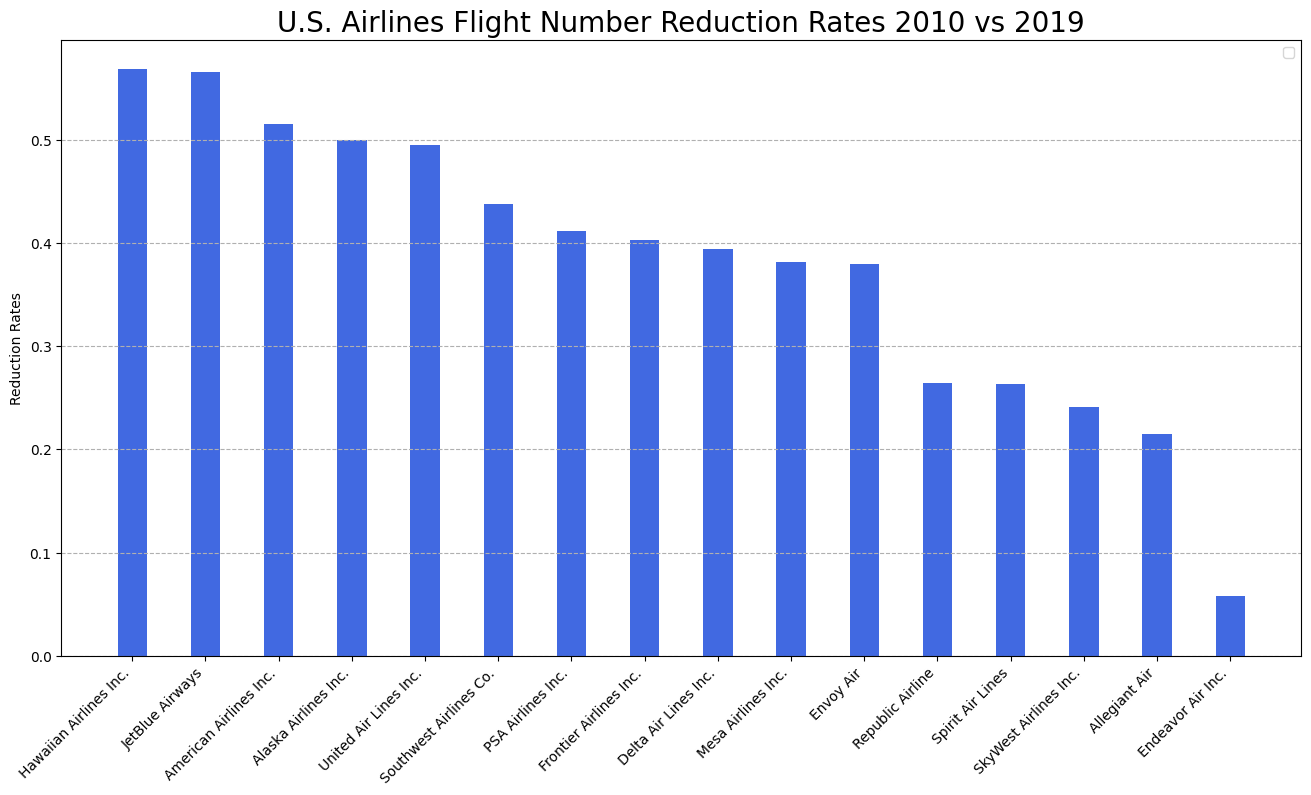

In [56]:
df_plot = df_2019_2020.dropna().sort_values('reduction_rate', ascending=False)
carriers = df_plot.carrier_name
x = np.arange(len(carriers))

plt.figure(figsize = (16, 8))

plt.bar(x, df_plot['reduction_rate'], width= 0.4, color='royalblue')

plt.ylabel('Reduction Rates')
plt.title('U.S. Airlines Flight Number Reduction Rates 2010 vs 2019', fontsize=20)
plt.xticks(x, carriers, rotation = 45, ha = 'right')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()

### Obervation 4:

1. Significant Decrease in arrived flights numbers due to Covid 19 pandemic;
2. Major International Airlines were severely affected, for example, American Airline, United Airlines, etc, reflecting big declines in domestic and especially international travel demand.
3. Leisure-oriented carriers also saw a significant drop, like Hawaiian airline, jetBlue (major and low-cost, focus on leisure travellers)
4. Regional Airlines showed more resilience, like Skywest Airline, Dec is Christmas holiday season so regional travel demand remains certain relatively steady
5. Alaska. special geographic location. Alaska airline's headquarter is in Seattle, iit heavily focuses in Alaska, west coast cities, and also routes to Hawaii and vacational sports
6. Endeavor Air drop less than 0.1


## **3.2 Delay Rate Comparisons**

In [58]:
df_2019_2020.columns

Index(['carrier', 'carrier_name', 'arr_flights_2019', 'arr_del15_2019',
       'arr_delay_2019', 'arr_flights_2020', 'arr_del15_2020',
       'arr_delay_2020', 'reduction_rate', 'carrier_type'],
      dtype='object')

In [59]:
df_2019_2020['delay_rate_2019'] = df_2019_2020['arr_del15_2019']/df_2019_2020['arr_flights_2019']
df_2019_2020['delay_rate_2020'] = df_2019_2020['arr_del15_2020']/df_2019_2020['arr_flights_2020']

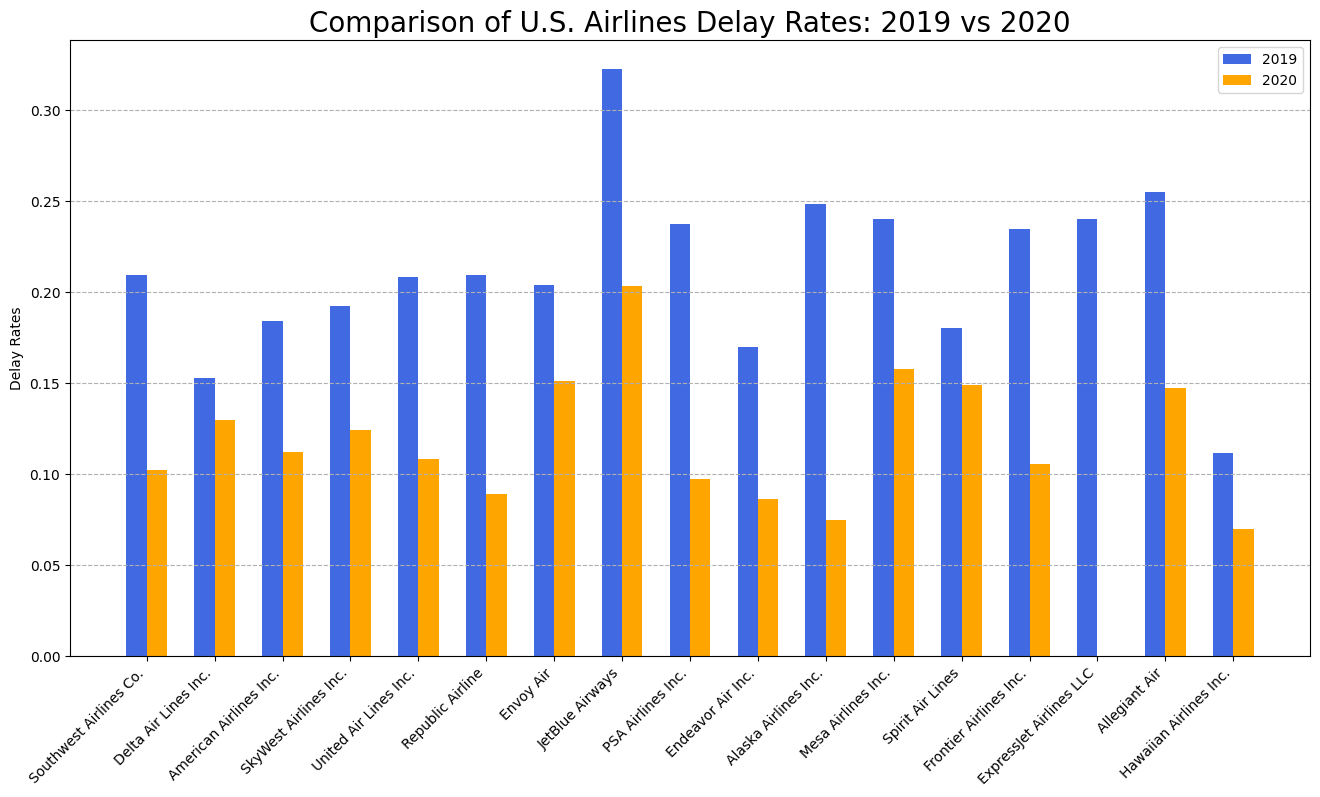

In [65]:
carriers = df_2019_2020.carrier_name
x = np.arange(len(carriers))
width = 0.3

plt.figure(figsize = (16, 8))

plt.bar(x - width /2, df_2019_2020['delay_rate_2019'], width, label='2019', color='royalblue')
plt.bar(x + width /2, df_2019_2020['delay_rate_2020'], width, label='2020', color='orange')

plt.ylabel('Delay Rates')
plt.title('Comparison of U.S. Airlines Delay Rates: 2019 vs 2020', fontsize=20)
plt.xticks(x, carriers, rotation = 45, ha = 'right')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()

## **3.3 Averge Delay Time Comparisons**

In [62]:
df_2019_2020.columns

Index(['carrier', 'carrier_name', 'arr_flights_2019', 'arr_del15_2019',
       'arr_delay_2019', 'arr_flights_2020', 'arr_del15_2020',
       'arr_delay_2020', 'reduction_rate', 'carrier_type', 'delay_rate_2019',
       'delay_rate_2020'],
      dtype='object')

In [63]:
df_2019_2020['avg_delay_time_2019'] = df_2019_2020['arr_delay_2019']/df_2019_2020['arr_del15_2019']
df_2019_2020['avg_delay_time_2020'] = df_2019_2020['arr_delay_2020']/df_2019_2020['arr_del15_2020']

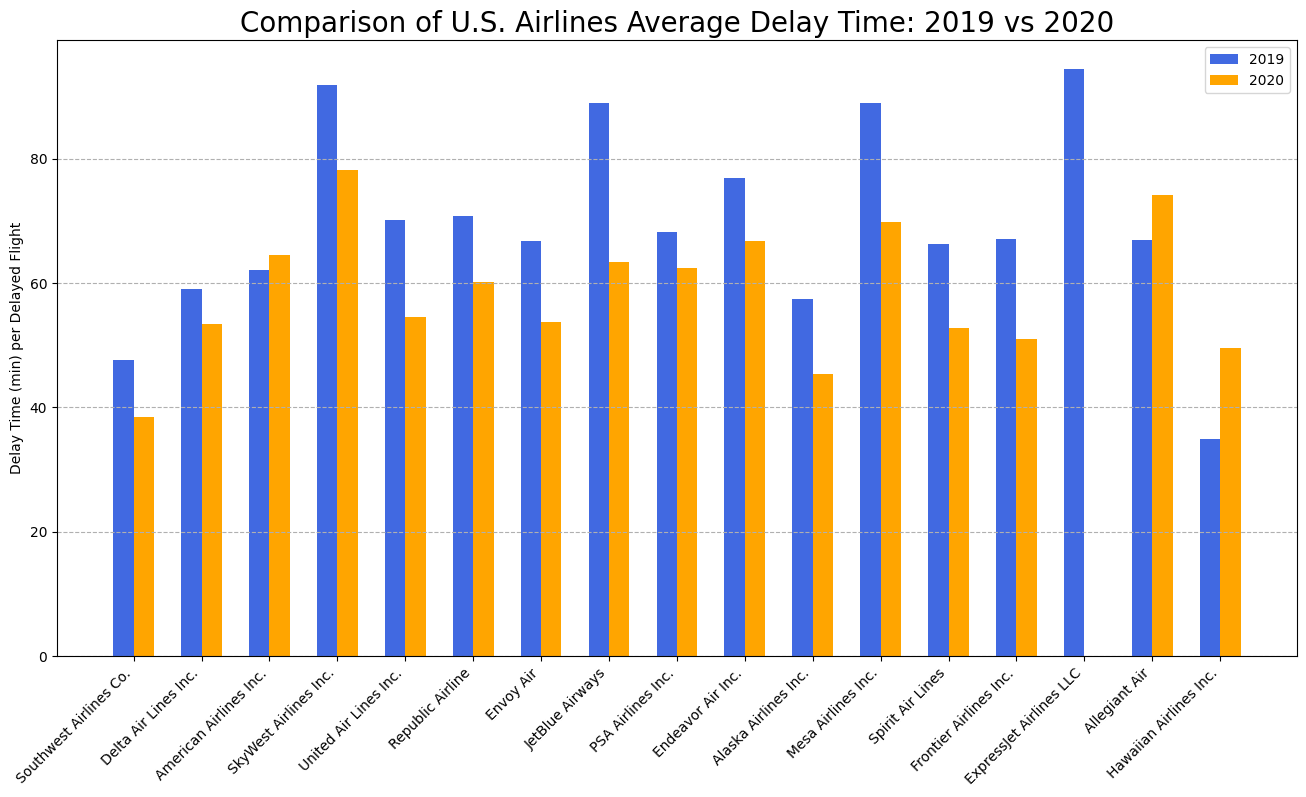

In [67]:
carriers = df_2019_2020.carrier_name
x = np.arange(len(carriers))
width = 0.3

plt.figure(figsize = (16, 8))

plt.bar(x - width /2, df_2019_2020['avg_delay_time_2019'], width, label='2019', color='royalblue')
plt.bar(x + width /2, df_2019_2020['avg_delay_time_2020'], width, label='2020', color='orange')

plt.ylabel('Delay Time (min) per Delayed Flight')
plt.title('Comparison of U.S. Airlines Average Delay Time: 2019 vs 2020', fontsize=20)
plt.xticks(x, carriers, rotation = 45, ha = 'right')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()